# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-11-20 01:01:21.925355: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-20 01:01:21.925416: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 01:01:21.925438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-AI001R0): /proc/driver/nvidia/version does not exist
2022-11-20 01:01:21.925638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**The compilation step**

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2681 - accuracy: 0.9218
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1093 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0387 - accuracy: 0.9884


**Using the model to make predictions**

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 56ms/step


array([3.3408512e-09, 6.6058109e-10, 5.0164130e-07, 1.8163202e-05,
       8.8460185e-12, 3.1264261e-08, 3.1109952e-12, 9.9998099e-01,
       3.1937859e-08, 2.8742841e-07], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.999981

In [18]:
test_labels[0]

7

**Evaluating the model on new data**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9803
test_acc: 0.9803000092506409


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [20]:
import numpy as np
x = np.array(12)
x

array(12)

In [21]:
x.ndim

0

### Vectors (rank-1 tensors)

In [22]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim

1

### Matrices (rank-2 tensors)

In [24]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [25]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [26]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.ndim

3

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

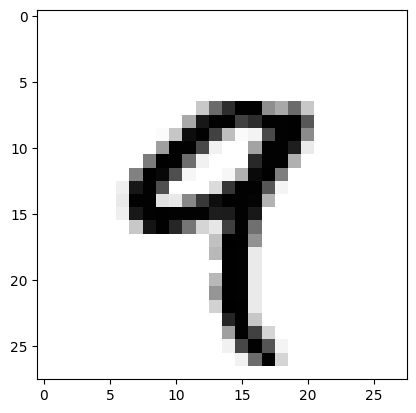

In [30]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [31]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [32]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[:, 14:, 14:]

In [36]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [37]:
batch = train_images[:128]

In [38]:
batch = train_images[128:256]

In [39]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

## The gears of neural networks: tensor operations

### Element-wise operations

In [40]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [41]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [42]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [43]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.24 s


### Broadcasting

In [77]:
import numpy as np
rng = np.random.default_rng(12345)
print(rng)

Generator(PCG64)


In [78]:
X = rng.integers(low=-128, high=128, size=(5,10), dtype=np.int8, endpoint=False)
print(X.shape)
print(X)

(5, 10)
[[  29   65  127   50   13   49  -78  -70   94   68]
 [ 100   73 -107 -109 -105  -47   89  111  -60  -76]
 [   2  -92  -96   76 -112  105    6   36   46 -122]
 [ -97   45 -115   -5 -117  125  -24   65  -97  -28]
 [ -61   15  100   86  -89  -53  -77  -43   29  101]]


In [79]:
y = rng.integers(low=-128, high=128, size=(10,), dtype=np.int8, endpoint=False)
print(y.shape)
print(y)

(10,)
[-79  67 -86  25 -33  10  16 -74  68  79]


In [80]:
y = np.expand_dims(y, axis=0)
print(y.shape)
print(y)

(1, 10)
[[-79  67 -86  25 -33  10  16 -74  68  79]]


In [82]:
Y = np.concatenate([y] * 5, axis=0)
print(Y.shape)
print(Y)

(5, 10)
[[-79  67 -86  25 -33  10  16 -74  68  79]
 [-79  67 -86  25 -33  10  16 -74  68  79]
 [-79  67 -86  25 -33  10  16 -74  68  79]
 [-79  67 -86  25 -33  10  16 -74  68  79]
 [-79  67 -86  25 -33  10  16 -74  68  79]]


In [83]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [87]:
x = rng.integers(low=-128, high=128, size=(3,2,4,6), dtype=np.int8, endpoint=False)
print(x)

[[[[-116   -4   17   10  124    0]
   [ 104   29  -34  -24  -93 -120]
   [  67   56  -93  -83  -17  -90]
   [ 108  -29   56  -27  108  -51]]

  [[  -4   61  -34  115  -63  117]
   [  93  -16   -7   62   29   37]
   [ -98   41  -13  -90   77   23]
   [ -16   78   27  -81   74  -73]]]


 [[[-125  -40  -14   68  -95  101]
   [ -19   -7    3  -33 -100  -24]
   [ -83  -49  115   -7   24   67]
   [ -83    9  -44  104  -42  -63]]

  [[ -43  112 -113  -97   71  -68]
   [ -83  -52   35   87  -79  125]
   [ -40  113  -16  -57  -56 -106]
   [ 101   42   59  -47   53  -62]]]


 [[[  50   29    2   86    4  -61]
   [  22   -5  -45   65  -68   17]
   [-108  -62  -60  -74 -106   46]
   [  16   27   19   37   97   -2]]

  [[ -51  -91  -18   54  -12  123]
   [-118  -65  -86  -40   94   27]
   [  18   76   38   86  123   57]
   [  36   -9   81 -119  -99  -82]]]]


In [88]:
y = rng.integers(low=-128, high=128, size=(4,6), dtype=np.int8, endpoint=False)
print(y)

[[ -75   99   35 -110  -44  -58]
 [  54   92  106 -117  -54    1]
 [ -52 -120   37  -83   21  -20]
 [ -75  -53  -59   82  -94   64]]


In [89]:
z = np.maximum(x, y)
print(z)

[[[[-75  99  35  10 124   0]
   [104  92 106 -24 -54   1]
   [ 67  56  37 -83  21 -20]
   [108 -29  56  82 108  64]]

  [[ -4  99  35 115 -44 117]
   [ 93  92 106  62  29  37]
   [-52  41  37 -83  77  23]
   [-16  78  27  82  74  64]]]


 [[[-75  99  35  68 -44 101]
   [ 54  92 106 -33 -54   1]
   [-52 -49 115  -7  24  67]
   [-75   9 -44 104 -42  64]]

  [[-43 112  35 -97  71 -58]
   [ 54  92 106  87 -54 125]
   [-40 113  37 -57  21 -20]
   [101  42  59  82  53  64]]]


 [[[ 50  99  35  86   4 -58]
   [ 54  92 106  65 -54  17]
   [-52 -62  37 -74  21  46]
   [ 16  27  19  82  97  64]]

  [[-51  99  35  54 -12 123]
   [ 54  92 106 -40  94  27]
   [ 18  76  38  86 123  57]
   [ 36  -9  81  82 -94  64]]]]


### Tensor product

In [90]:
x = rng.integers(low=-8, high=8, size=(5,), dtype=np.int8, endpoint=False)
print(x)

[-8 -8  5 -3 -8]


In [91]:
y = rng.integers(low=-8, high=8, size=(5,), dtype=np.int8, endpoint=False)
print(y)

[ 0 -5  6  4 -5]


In [92]:
z = np.dot(x, y)
print(z)

98


In [93]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [94]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [95]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [99]:
x = rng.integers(low=-8, high=8, size=(2,3,4), dtype=np.int32, endpoint=False)
print(x)

[[[ 4  0 -7  2]
  [-7 -6  7 -5]
  [ 1  2  5 -7]]

 [[ 5  6  3 -2]
  [-4  1  2 -3]
  [ 2 -6 -4 -8]]]


In [100]:
y = rng.integers(low=-8, high=8, size=(4,2), dtype=np.int32, endpoint=False)
print(y)

[[-4 -5]
 [ 5  5]
 [ 5  7]
 [ 2 -1]]


In [101]:
z = np.dot(x, y)
print(z)

[[[-47 -71]
  [ 23  59]
  [ 17  47]]

 [[ 21  28]
  [ 25  42]
  [-74 -60]]]


### Tensor reshaping

In [102]:
train_images = train_images.reshape((60000, 28 * 28))

In [103]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [104]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [105]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

## The engine of neural networks: gradient-based optimization

### Chaining derivatives: The Backpropagation algorithm

#### The gradient tape in TensorFlow

In [112]:
import tensorflow as tf

# instantiate a scalar variable with an initial value of 0
x = tf.Variable(0.)

# open a GradientTape scope
with tf.GradientTape() as tape:
    # inside the scope, apply some tensor operations to the variable
    y = 2 * x + 3
    
# use the tape to retrieve the gradient of the output y with respect to our variable x
dydx = tape.gradient(y, x)
print(dydx)

tf.Tensor(2.0, shape=(), dtype=float32)


In [113]:
# instantiate a variable with shape (2,2) and initial values at random
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = 2 * x + 3
    
dydx = tape.gradient(y, x)
print(dydx)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [171]:
# initialize weights as random integers
W_init = tf.random.uniform(
    shape=(2,2),
    minval=-8,
    maxval=8,
    dtype=tf.dtypes.int32,
    seed=12345
)
# cast weights to reals
W_init = tf.cast(W_init, tf.float32)

# declare variable that GradientTape will track for differentiation
W = tf.Variable(W_init)
print(W)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0., -6.],
       [ 3., -8.]], dtype=float32)>


In [185]:
# initialize bias as zero vector
b_init = tf.zeros(
    shape=(2,1),
    dtype=tf.dtypes.float32
)

# declare variable that GradientTape will track for differentiation
b = tf.Variable(b_init)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>


In [186]:
# first initialize input pattern as random integers
X_init = tf.random.uniform(
    shape=(2,2),
    minval=-8,
    maxval=8,
    dtype=tf.dtypes.int32,
    seed=12345
)

# cast input pattern to reals
X_init = tf.cast(X_init, tf.float32)

# declare variable that GradientTape will track for differentiation
X = tf.Variable(X_init)
print(X)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 6.,  1.],
       [-7.,  1.]], dtype=float32)>


In [200]:
with tf.GradientTape() as tape:
    y = tf.matmul(X, W) + b
[dydX, dydW, dydb] = tape.gradient(y, [X, W, b])
dydX = dydX.numpy()
dydW = dydW.numpy()
dydb = dydb.numpy()
print(dydX)
print(dydW)
print(dydb)

[[-6. -5.]
 [-6. -5.]]
[[-1. -1.]
 [ 2.  2.]]
[[2.]
 [2.]]


In [191]:
dydy = np.array([[1,1],[1,1]])
dydX = np.matmul(dydy, np.transpose(W))
print(dydX)

[[-6. -5.]
 [-6. -5.]]


In [192]:
dydW = np.matmul(np.transpose(X), dydy)
print(dydW)

[[-1. -1.]
 [ 2.  2.]]


In [193]:
dydb = np.matmul(dydy,np.ones((2,1)))
print(dydb)

[[2.]
 [2.]]


$$\begin{align}
XW + b &= Y\\[2ex]
\left(
\begin{array}{cc}
 x_{11} & x_{12} \\
 x_{21} & x_{22} \\
\end{array}
\right)
\left(
\begin{array}{cc}
 w_{11} & w_{12} \\
 w_{21} & w_{22} \\
\end{array}
\right)+
\left(
\begin{array}{c}
 b_1 \\
 b_2 \\
\end{array}
\right)
&=
\left(
\begin{array}{cc}
 y_{11} & y_{12} \\
 y_{21} & y_{22} \\
\end{array}
\right)\\[2ex]
\left(
\begin{array}{cc}
 x_{11} w_{11} + x_{12} w_{21} + b_1 & x_{11} w_{12} + x_{12} w_{22} + b_1 \\
 x_{21} w_{11} + x_{22} w_{21} + b_2 & x_{21} w_{12} + x_{22} w_{22} + b_2 \\
\end{array}
\right)
&=\left(
\begin{array}{cc}
 y_{11} & y_{12} \\
 y_{21} & y_{22} \\
\end{array}
\right)
\end{align}$$

$$
\begin{align}
\frac{\partial Y}{\partial Y}
&=\left(
\begin{array}{cc}
 1 & 1 \\
 1 & 1 \\
\end{array}
\right)
\\[2ex]
\frac{\partial Y}{\partial X}
&=\left(
\begin{array}{cc}
 w_{11}+w_{12} & w_{21}+w_{22} \\
 w_{11}+w_{12} & w_{21}+w_{22} \\
\end{array}
\right)=\frac{\partial Y}{\partial Y}W^T
\\[2ex]
\frac{\partial Y}{\partial W}
&=\left(
\begin{array}{cc}
 x_{11}+x_{21} & x_{11}+x_{21} \\
 x_{12}+x_{22} & x_{12}+x_{22} \\
\end{array}
\right)=X^T\frac{\partial Y}{\partial Y}
\\[2ex]
\frac{\partial Y}{\partial b}
&=\left(
\begin{array}{c}
 2 \\
 2 \\
\end{array}
\right)=\frac{\partial Y}{\partial Y}
\left(
\begin{array}{c}
 1 \\
 1 \\
\end{array}
\right)
\end{align}$$

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary